Predicting credit card default. Training data (ID 1 to 25,000). Testing set (ID 25,001 to 30,000)

In [3]:
import missingno as msno 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [4]:
creditcard=pd.read_excel("default of credit card clients.xls",header=1)

In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Dictionary

*   ID: ID of each client
* 	LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* 	SEX: Gender (1=male, 2=female)
* 	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* 	MARRIAGE: Marital status (1=married, 2=single, 3=others)
* 	AGE: Age in years
* 	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* 	PAY_2: Repayment status in August, 2005 (scale same as above)
* 	PAY_3: Repayment status in July, 2005 (scale same as above)
* 	PAY_4: Repayment status in June, 2005 (scale same as above)
* 	PAY_5: Repayment status in May, 2005 (scale same as above)
* 	PAY_6: Repayment status in April, 2005 (scale same as above)
* 	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* 	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* 	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* 	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* 	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* 	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* 	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* 	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* 	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* 	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* 	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* 	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* 	default.payment.next.month: Default payment (1=yes, 0=no)

In [7]:
# rename the default status column
creditcard = creditcard.rename(columns={"default payment next month": "next_default"})

In [8]:
# show the distribution of credit card default
creditcard['next_default'].value_counts(normalize=True, dropna=True)

0    0.7788
1    0.2212
Name: next_default, dtype: float64

In [9]:
# check for missing data
missing_fractions = creditcard.isnull().mean().sort_values(ascending=False)
missing_fractions

next_default    0.0
PAY_6           0.0
LIMIT_BAL       0.0
SEX             0.0
EDUCATION       0.0
MARRIAGE        0.0
AGE             0.0
PAY_0           0.0
PAY_2           0.0
PAY_3           0.0
PAY_4           0.0
PAY_5           0.0
BILL_AMT1       0.0
PAY_AMT6        0.0
BILL_AMT2       0.0
BILL_AMT3       0.0
BILL_AMT4       0.0
BILL_AMT5       0.0
BILL_AMT6       0.0
PAY_AMT1        0.0
PAY_AMT2        0.0
PAY_AMT3        0.0
PAY_AMT4        0.0
PAY_AMT5        0.0
ID              0.0
dtype: float64

In [10]:
# create a new column with the text default status
creditcard['default_status']=creditcard['next_default']
creditcard.loc[(creditcard.default_status==0), 'default_status'] = 'No Default'
creditcard.loc[(creditcard.default_status==1), 'default_status'] = 'Default'

In [11]:
def plot_var(feature, feature_name, continuous):
    
    # Visualize a variable with and without the loan status.
    # 1. feature is the variable name in the dataframe
    # 2. feature_name is the full variable name
    # 3. continuous is True if the variable is continuous, False otherwise
    
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    
    # Plot without loan status
    if continuous:
        sns.distplot(creditcard.loc[creditcard[feature].notnull(), feature], kde=False, ax=ax1)
    else:
        sns.countplot(creditcard[feature], order=sorted(creditcard[feature].unique()), saturation=1, ax=ax1)
        
    ax1.set_xlabel(feature_name)
    ax1.set_ylabel('Count')
    ax1.set_title(feature_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=feature, y='default_status', data=creditcard, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(feature_name + ' by Repayment Status')
    else:
        charge_off_rates = creditcard.groupby(feature)['default_status'].value_counts(normalize=True)
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Credit Card Not Repaid')
        ax2.set_title('Non-Repayment Rate by ' + feature_name)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')
        ax2.set_xlabel(feature_name)
    
    plt.tight_layout()

## Gender

1=male, 2=female

In [12]:
creditcard['SEX'].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

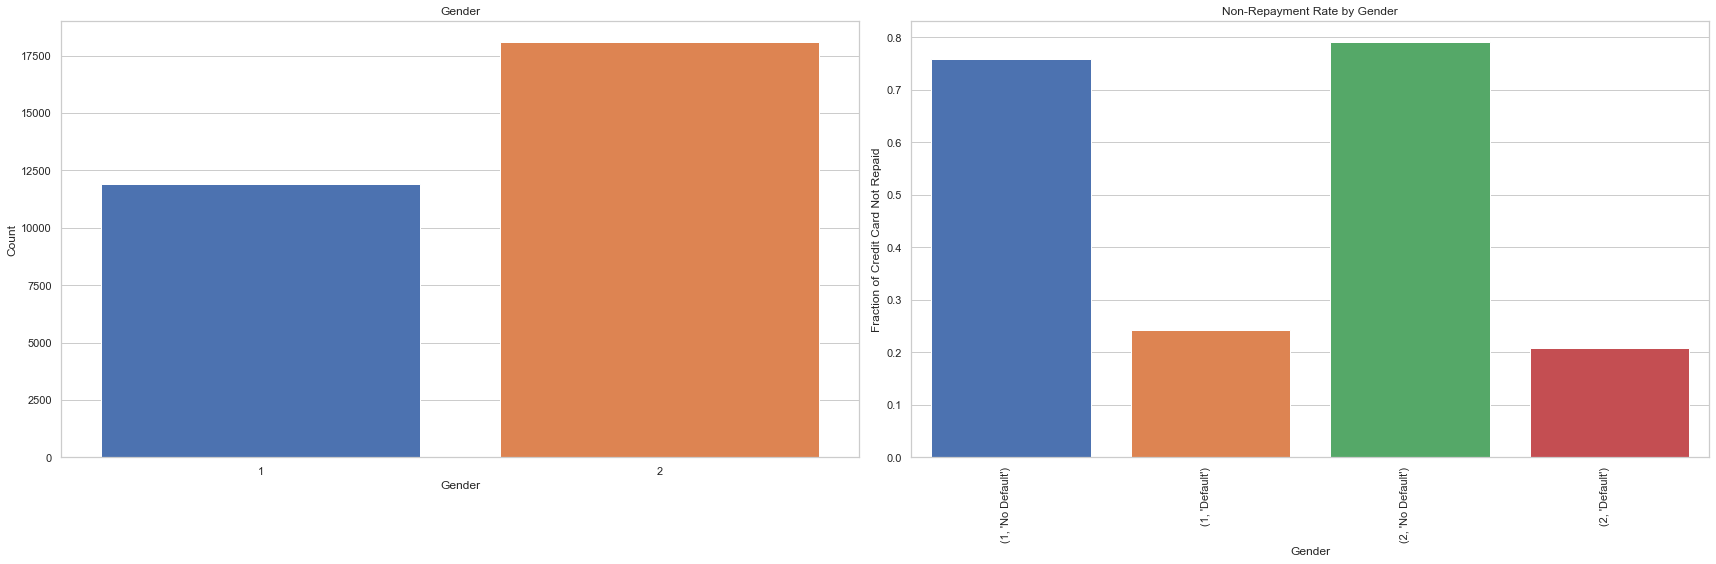

In [13]:
plot_var('SEX', 'Gender', continuous=False)

## Education

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

In [14]:
creditcard['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [15]:
# replace 0, 5, 6 with 4
creditcard['EDUCATION'].replace([5, 6, 0], 4, inplace=True)

In [16]:
creditcard['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
4    0.015600
Name: EDUCATION, dtype: float64

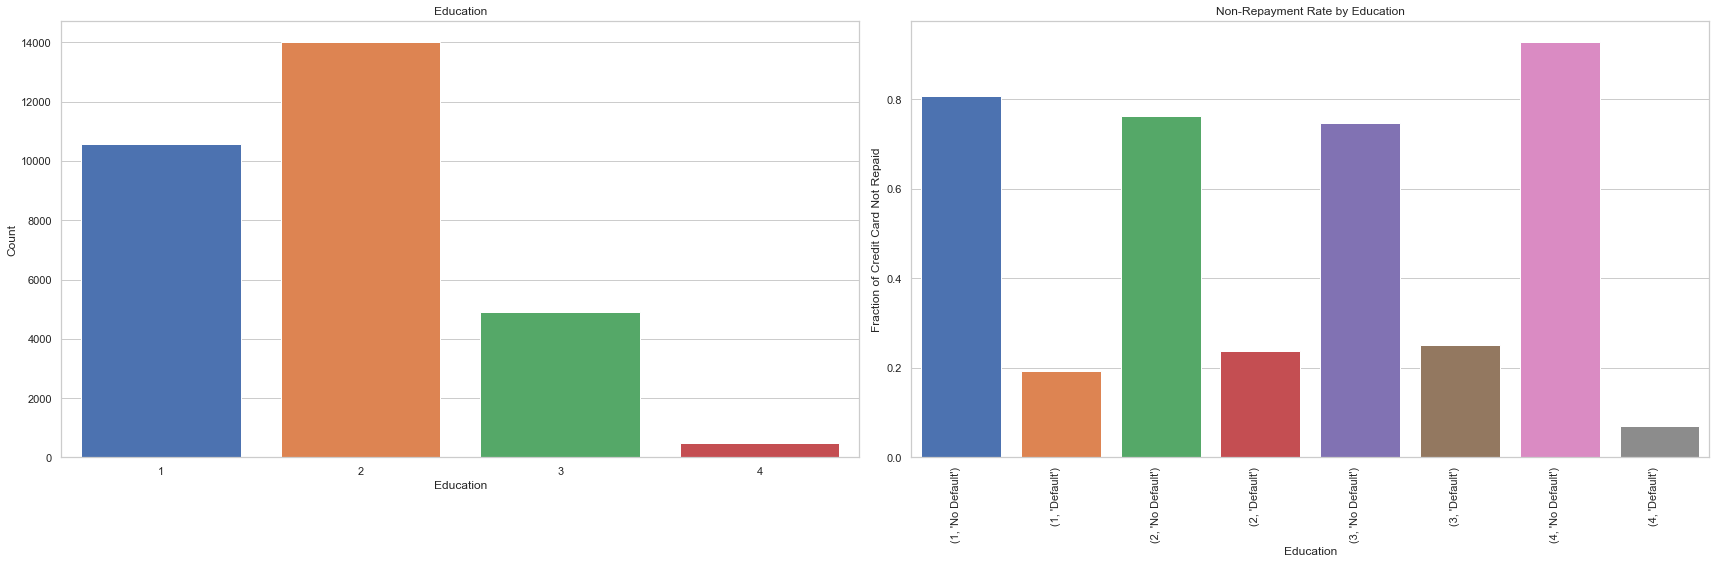

In [17]:
plot_var('EDUCATION', 'Education', continuous=False)

## Marriage

1=married, 2=single, 3=others

In [18]:
creditcard['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [19]:
# replace 0 with 3
creditcard['MARRIAGE'].replace([0], 3, inplace=True)

In [20]:
creditcard['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

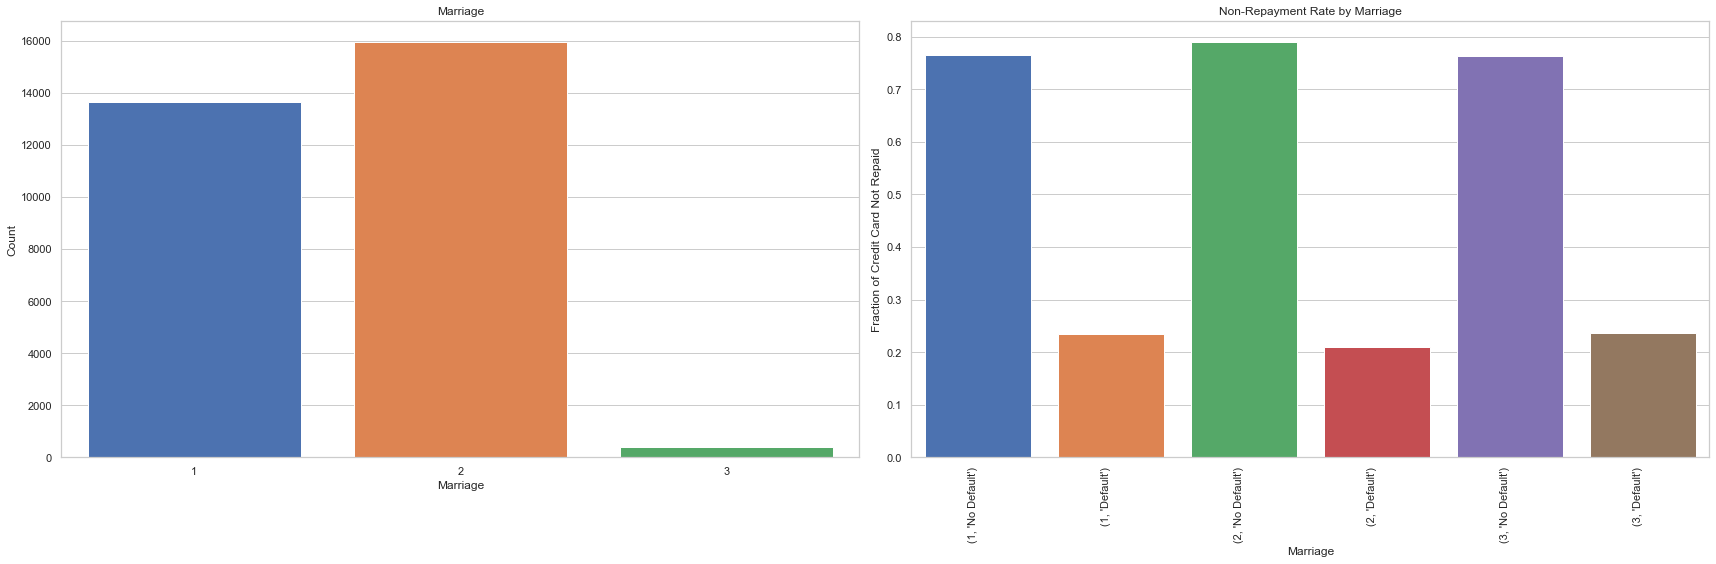

In [21]:
plot_var('MARRIAGE', 'Marriage', continuous=False)

## Age

In [22]:
creditcard['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

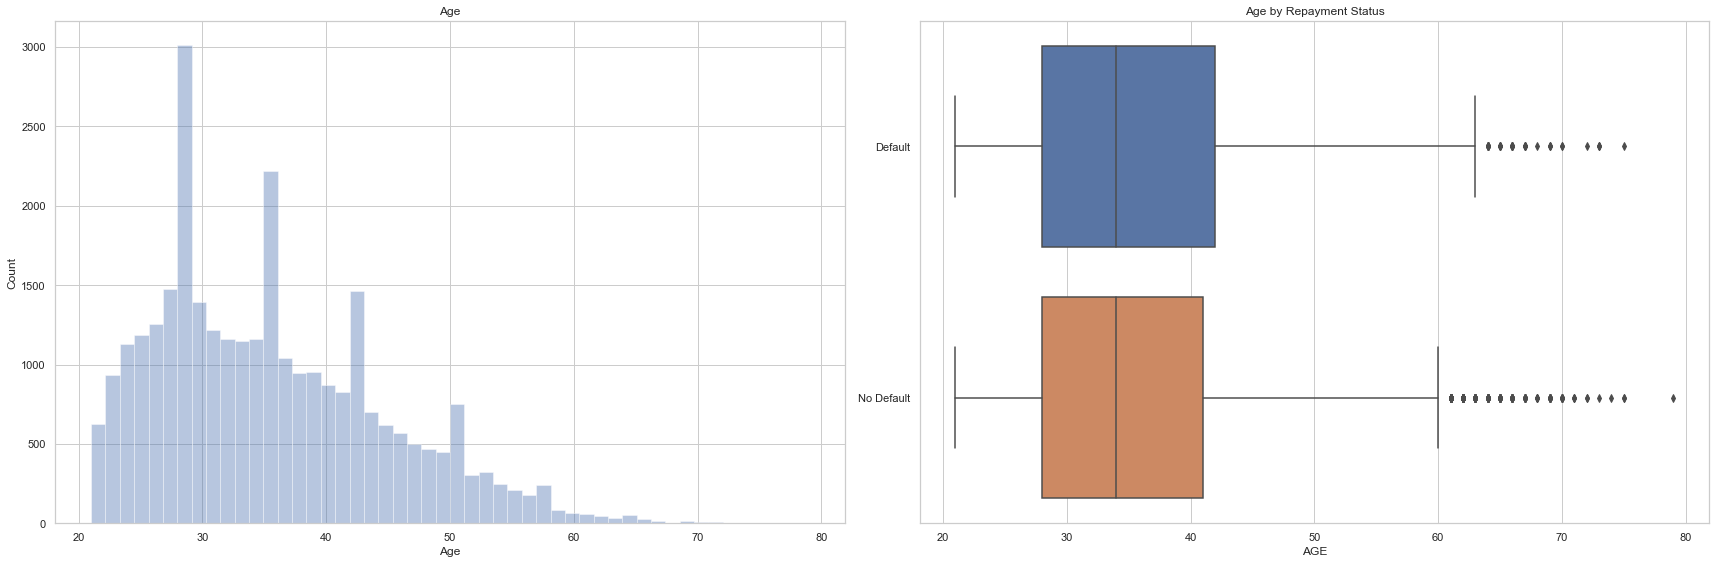

In [23]:
plot_var('AGE', 'Age', continuous=True)

## Limit Balance


In [24]:
creditcard['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

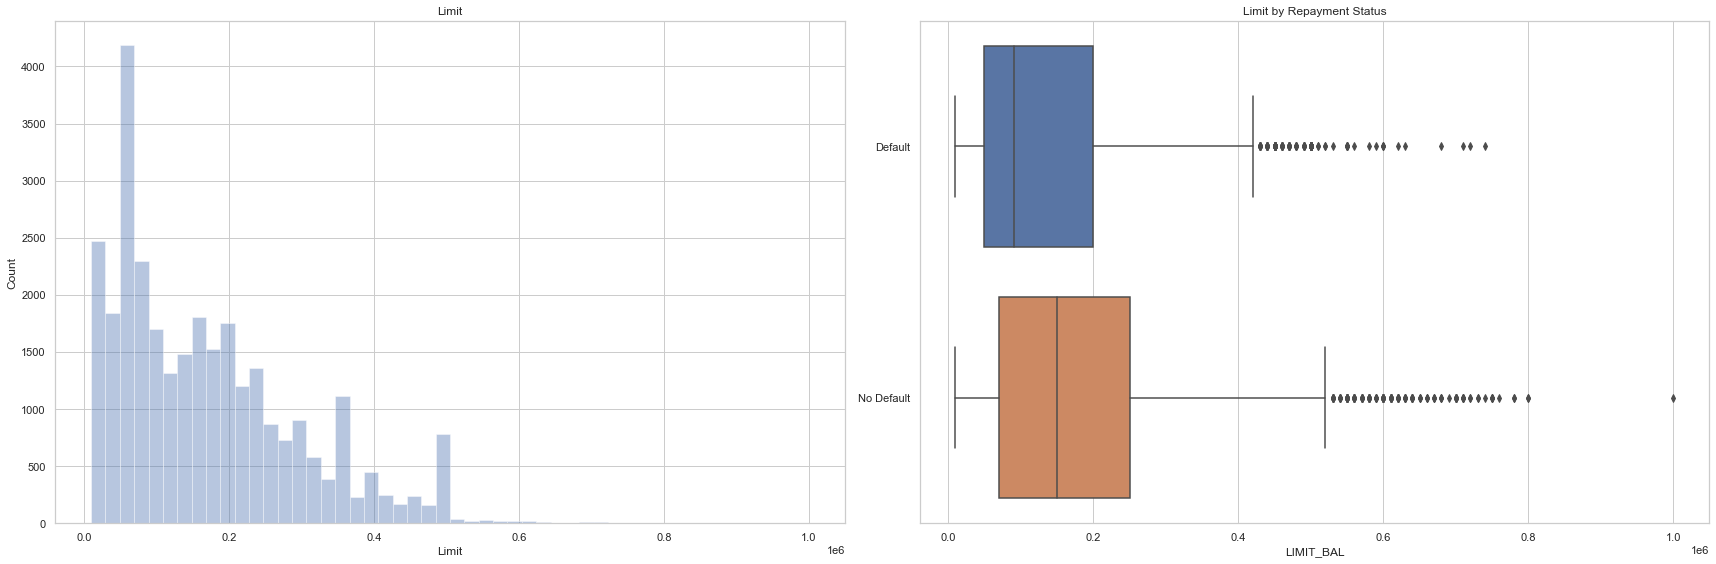

In [25]:
plot_var('LIMIT_BAL', 'Limit', continuous=True)

## Bill Amount in September

In [26]:
creditcard['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

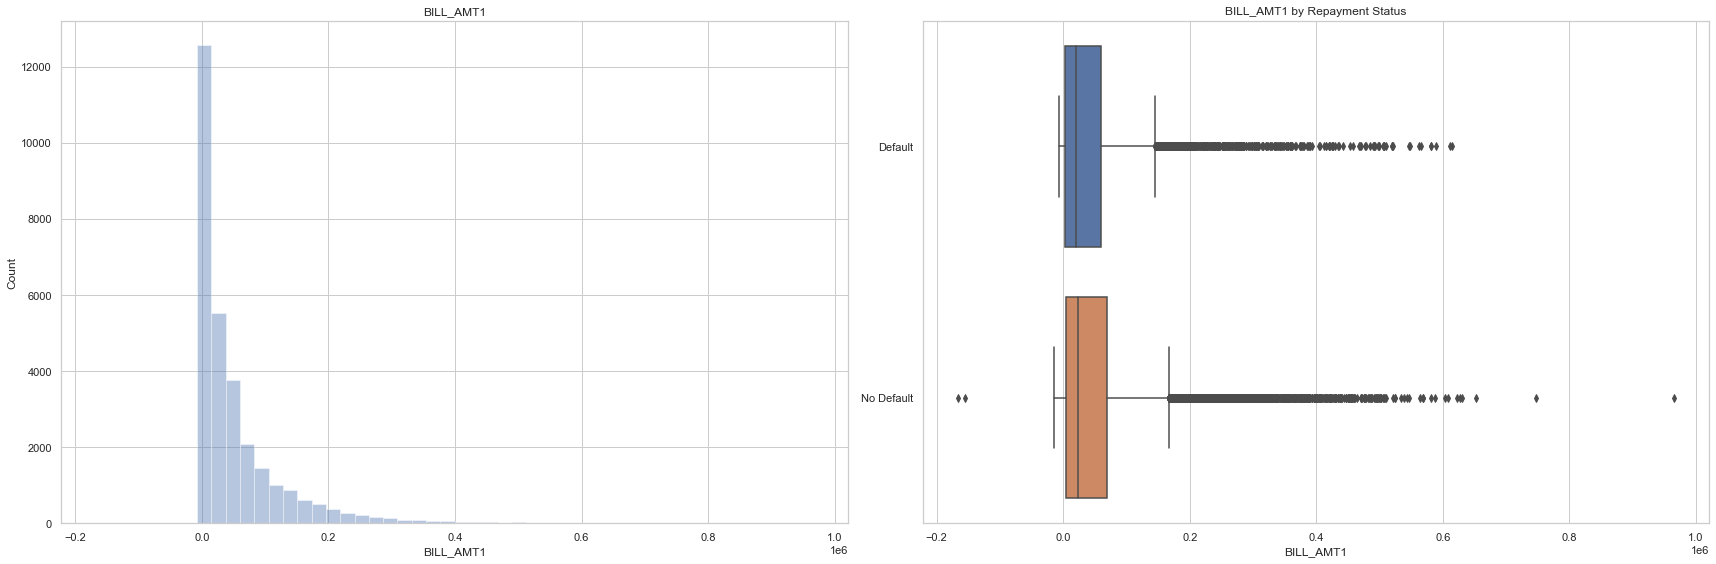

In [27]:
plot_var('BILL_AMT1', 'BILL_AMT1', continuous=True)

## Average of Repayment Status

-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above

In [28]:
# calculate the average repayment status from April to September 
col = creditcard.loc[: , "PAY_0":"PAY_6"]
creditcard['avg_repay_status'] = col.mean(axis=1)

In [29]:
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,next_default,default_status,avg_repay_status
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,Default,-0.333333
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,Default,0.500000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,No Default,0.000000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,No Default,0.000000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,No Default,-0.333333


In [30]:
creditcard['avg_repay_status'].describe()

count    30000.000000
mean        -0.182439
std          0.982176
min         -2.000000
25%         -0.833333
50%          0.000000
75%          0.000000
max          6.000000
Name: avg_repay_status, dtype: float64

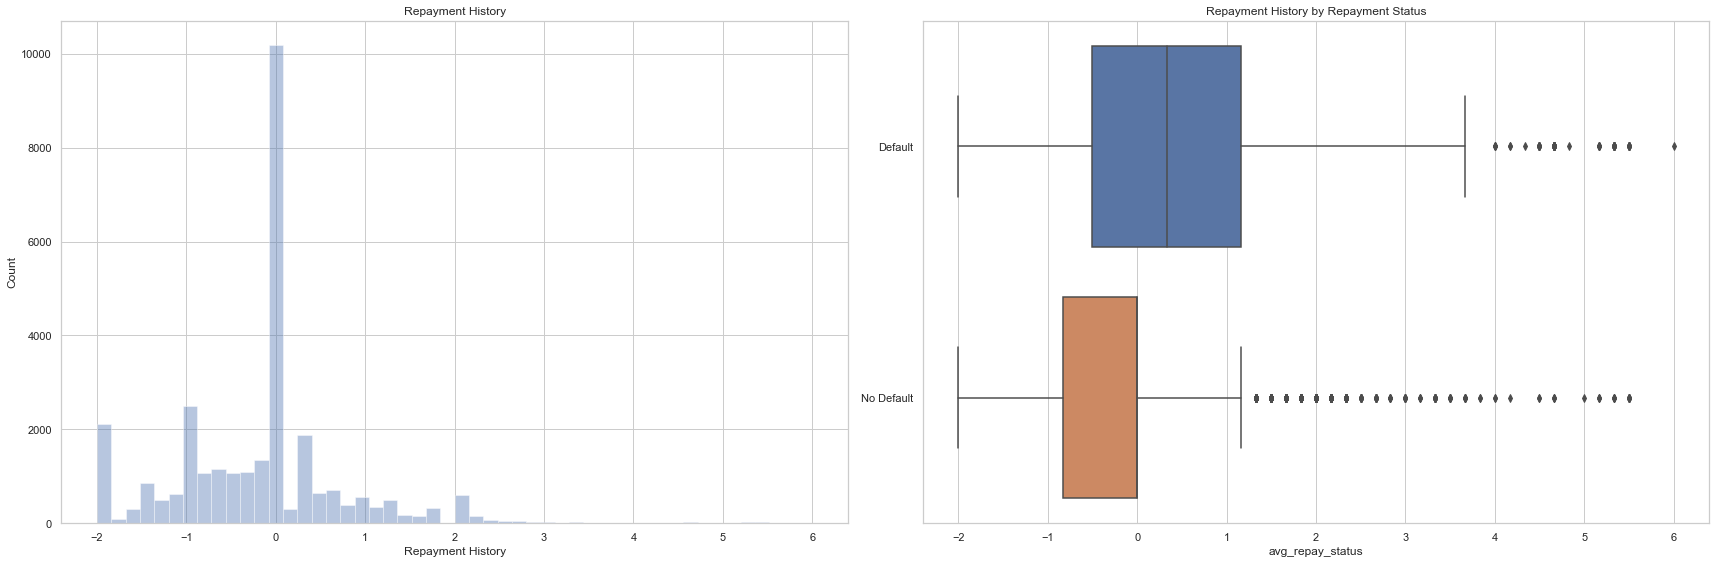

In [31]:
plot_var('avg_repay_status', 'Repayment History', continuous=True)

We select below features:


* EDUCATION
* AGE
* LIMIT_BAL
* avg_repay_status


In [32]:
# Subset data to the 4 features and the target
# Modify your set of features here
data = creditcard[["ID","EDUCATION","AGE","LIMIT_BAL", "avg_repay_status","next_default"]]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30000 non-null  int64  
 1   EDUCATION         30000 non-null  int64  
 2   AGE               30000 non-null  int64  
 3   LIMIT_BAL         30000 non-null  int64  
 4   avg_repay_status  30000 non-null  float64
 5   next_default      30000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.4 MB


In [34]:
# create dummy variables
data = pd.get_dummies(data, columns=['EDUCATION'], drop_first=True)

In [35]:
data.shape

(30000, 8)

In [36]:
data.sample(5)

,ID,AGE,LIMIT_BAL,avg_repay_status,next_default,EDUCATION_2,EDUCATION_3,EDUCATION_4
17141,17142,26,130000,0.000000,0,1,0,0
10344,10345,28,90000,0.000000,0,1,0,0
23285,23286,35,100000,-0.166667,0,0,1,0
19397,19398,33,240000,0.000000,0,0,0,0
3843,3844,33,50000,0.000000,0,1,0,0


In [37]:
data_train = data.loc[data['ID'] <=  25000].copy()
data_test =  data.loc[data['ID'] > 25000].copy()

In [38]:
print('Number of records in the partition:   ', data_train.shape[0] + data_test.shape[0])
print('Number of records in the full dataset:', data.shape[0])

Number of records in the partition:    30000
Number of records in the full dataset: 30000


In [39]:
data_train.drop('ID', axis=1, inplace=True)
data_test.drop('ID', axis=1, inplace=True)

In [40]:
y_train = data_train['next_default']
y_test = data_test['next_default']

In [41]:
X_train = data_train.drop('next_default', axis=1)
X_test = data_test.drop('next_default', axis=1)

In [42]:
del data_train, data_test

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Logistic regression with SGD training

In [44]:
from sklearn.linear_model import SGDClassifier

In [45]:
pipeline_sgdlogreg = Pipeline([
    
    # Imputation in-place
    # Mean imputation by default
    ('imputer', SimpleImputer(copy=False)), 
    
    # Standardize features by removing the mean and scaling to unit variance
    # The standard score of a sample x is calculated as:
    # z = (x - u) / s
    ('scaler', StandardScaler(copy=False)),  
    
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [46]:
param_grid_sgdlogreg = {
    # Regularization parameter: Higher regularization value -> smoother classifier -> less risk of overfitting but lower accuracy on training data
    'model__alpha': [10**-5, 10**-2, 10**1],
    # Regularization method
    'model__penalty': ['l1', 'l2']
}

In [47]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [48]:
grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer(copy=False)),
                                       ('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(loss='log',
                                                      random_state=1,
                                                      warm_start=True))]),
             n_jobs=1,
             param_grid={'model__alpha': [1e-05, 0.01, 10],
                         'model__penalty': ['l1', 'l2']},
             pre_dispatch=1, scoring='roc_auc', verbose=1)

In [49]:
grid_sgdlogreg.best_score_

0.687820705131167

In [50]:
grid_sgdlogreg.best_params_

{'model__alpha': 10, 'model__penalty': 'l2'}

[[19422     0]
 [ 5578     0]]


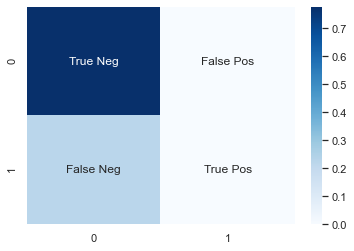

In [51]:
# Generate predictions with the model using our X values
y_pred = grid_sgdlogreg.predict(X_train)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_train, y_pred)
print(cf_matrix)

labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt="", cmap="Blues")

## Test set evaluation

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
y_score = grid_sgdlogreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.6990148504928265

[[3942    0]
 [1058    0]]


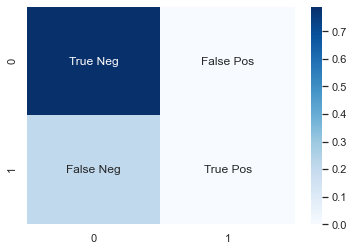

In [54]:
# Generate predictions with the model using our X values
y_pred = grid_sgdlogreg.predict(X_test)

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt="", cmap="Blues")